In [21]:
#Importing library
import re
import json
import pandas as pd
import seaborn as sns
from itertools import chain
from datetime import timedelta
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [22]:
#Installing wordcloud
%pip install wordcloud
from wordcloud import WordCloud

Note: you may need to restart the kernel to use updated packages.


In [23]:
def mergeDicts(dict1, dict2):
    return dict1 | dict2

f=open('data.json')
a_json = json.load(f)
f.close()
list = []
for i in a_json:
    snippet = i['snippet']
    statistics = i['statistics']
    list.append(mergeDicts(snippet, statistics))
dataframe = pd.DataFrame.from_dict(list)

#Parsed dict attribute
parsed_localized = dataframe['localized'].apply(pd.Series)
#Drop parsed columns and thumbnails
dataframe = dataframe.drop(['thumbnails', 'localized'], axis=1)
#Concat parsed columns
dataframe = pd.concat([dataframe, parsed_localized],  axis=1)
dataframe.head()


,publishedAt,channelId,title,description,channelTitle,tags,categoryId,liveBroadcastContent,defaultAudioLanguage,viewCount,likeCount,favoriteCount,commentCount,defaultLanguage,title,description
0,2022-05-06T14:28:11Z,UCndcERoL9eG-XNljgUk1Gag,🔴Trực tiếp | U23 Việt Nam - U23 Indonesia | B...,VFF Channel | 🔴Trực tiếp | U23 Việt Nam - U23...,VFF Channel,"[U23 Vietnam - U23 Indonesia, U23 Indonesia vs...",17,none,vi,1673462,12406,0,32,NaN,🔴Trực tiếp | U23 Việt Nam - U23 Indonesia | B...,VFF Channel | 🔴Trực tiếp | U23 Việt Nam - U23...
1,2022-05-06T13:57:52Z,UCoqrrrfDpWOgdqw1vRoiG_A,Highlights Việt Nam vs Indonesia | Hùng Dũng ...,#Highlights #Vietnam #Indonesia #SEAGames31\nH...,MÃN NHÃN TV,"[Highlights việt nam vs indonesia, Highlights ...",17,none,NaN,1592686,14540,0,1992,NaN,Highlights Việt Nam vs Indonesia | Hùng Dũng ...,#Highlights #Vietnam #Indonesia #SEAGames31\nH...
2,2022-05-06T14:28:42Z,UCljFFNaQoJWeP91Bz4m_3bw,🔴 TRỰC TIẾP: U23 VIỆT NAM vs U23 INDONESIA (BẢ...,🔴 TRỰC TIẾP: U23 VIỆT NAM vs U23 INDONESIA (BẢ...,FPT Bóng Đá Việt,"[việt nam indo, vn indo, vn indonesia, việt na...",17,none,NaN,1787328,15026,0,84,NaN,🔴 TRỰC TIẾP: U23 VIỆT NAM vs U23 INDONESIA (BẢ...,🔴 TRỰC TIẾP: U23 VIỆT NAM vs U23 INDONESIA (BẢ...
3,2022-05-06T14:15:06Z,UCFF85Rdo1MqYCFxfmByBOdw,Trực Tiếp VIỆT NAM vs INDONESIA (Bản Chính Thứ...,Trực Tiếp VIỆT NAM vs INDONESIA (Bản Chính Thứ...,Đỗ Kim Phúc - Freestyle Football,"[việt nam indonesia seagame 31, viet nam indon...",17,none,NaN,797896,9286,0,279,NaN,Trực Tiếp VIỆT NAM vs INDONESIA (Bản Chính Thứ...,Trực Tiếp VIỆT NAM vs INDONESIA (Bản Chính Thứ...
4,2022-05-06T14:30:52Z,UCV7c-u0gXHrWb3JbYyP0Ffg,🔴Trực Tiếp VIỆT NAM vs INDONESIA ( Bản Chính T...,#VietNam #Indonesia #Seagames\n🔴Trực Tiếp VIỆT...,Trực Tiếp Bóng Đá,"[việt nam vs indonesia seagame 31, việt nam vs...",17,none,NaN,830267,8133,0,5,NaN,🔴Trực Tiếp VIỆT NAM vs INDONESIA ( Bản Chính T...,#VietNam #Indonesia #Seagames\n🔴Trực Tiếp VIỆT...


In [24]:
#Duplicating and cleaning data
df_copy = dataframe.loc[:,~dataframe.columns.duplicated()]
df_copy.drop(columns=['favoriteCount', 'defaultLanguage', 'defaultAudioLanguage', 'liveBroadcastContent'], inplace=True)
df_copy['publishedAt'] = pd.to_datetime(df_copy['publishedAt'])
df_copy['categoryId'] = df_copy['categoryId'].astype(int)
factor_list = ['viewCount', 'likeCount', 'commentCount']
df_copy[factor_list] = df_copy[factor_list].dropna().astype(float)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   publishedAt   200 non-null    datetime64[ns, UTC]
 1   channelId     200 non-null    object             
 2   title         200 non-null    object             
 3   description   200 non-null    object             
 4   channelTitle  200 non-null    object             
 5   tags          180 non-null    object             
 6   categoryId    200 non-null    int64              
 7   viewCount     193 non-null    float64            
 8   likeCount     193 non-null    float64            
 9   commentCount  193 non-null    float64            
dtypes: datetime64[ns, UTC](1), float64(3), int64(1), object(5)
memory usage: 15.8+ KB


/Users/hoandoan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/var/folders/jn/q6h7c5jx75n942fhjt9blgpc0000gn/T/ipykernel_1285/2109744550.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['publishedAt'] = pd.to_datetime(df_copy['publishedAt'])
/var/folders/jn/q6h7c5jx75n942fhjt9blgpc0000gn/T/ipykernel_1285/2109744550.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [25]:
#Checking number of popular videos of top 10 channels
channel_index = df_copy['channelTitle'].value_counts()[:10].index
top_channel_title = pd.DataFrame({'Channel Title': channel_index, 'No popular videos': df_copy['channelTitle'].value_counts()[:10] })
top_channel_title.index=[i for i in range(1,11)]
print(top_channel_title)

                      Channel Title  No popular videos
1                    Anh Ba Phải TV                  3
2                    On Sports Plus                  3
3                    Ưng Hoàng Phúc                  3
4                 TRẦN THANH CHƯƠNG                  3
5   Liên Quân Mobile eSports-Garena                  3
6                        MrBB Vlogs                  3
7             Tôm channel officical                  3
8                        Thơ Nguyễn                  2
9                      mingweirocks                  2
10                      UNI NETWORK                  2


<AxesSubplot:xlabel='No popular videos', ylabel='Channel Title'>

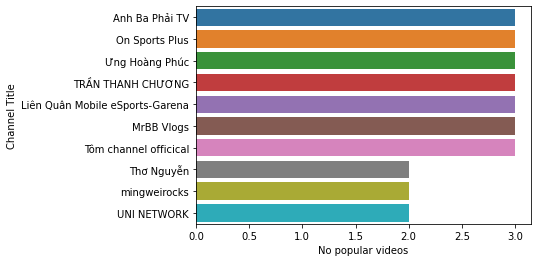

In [26]:
sns.barplot(x='No popular videos', y='Channel Title', data=top_channel_title)

In [27]:
#Defining function generating wordcloud
f2 = open('vietnamese.txt', 'r', encoding='utf-8')
stopwords = f2.readlines()
stop_set = set(m.strip() for m in stopwords)
additional_stopwords = ['Nan', 'https', 'com', 'www', 'tập']
stop_set |= set(additional_stopwords)
def gen_wc(title, text):
    string = df_copy[text].to_string()
    wc = WordCloud(width=1200, height=500, background_color="white", repeat=True, stopwords=stop_set)
    wc.generate(string)
    plt.axis("off")
    plt.imshow(wc, interpolation="bilinear")
    plt.title(title, size = 24)
    plt.show()

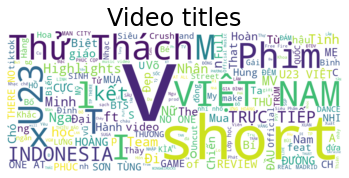

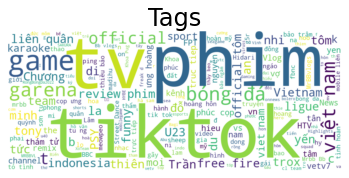

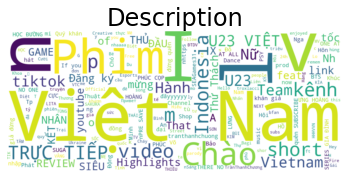

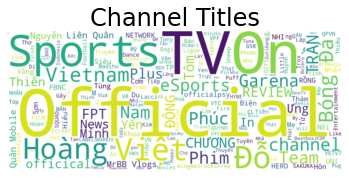

In [28]:
#Word clouds
gen_wc('Video titles', 'title')
gen_wc("Tags", 'tags')
gen_wc("Description", "description")
gen_wc("Channel Titles", 'channelTitle')

In [29]:
#Def function used to count each of the popular words in each attribute
def count_popular_words(attribute_name, attribute_list, attribute):
    attribute_words_count = dict((x, 0) for x in attribute_list)
    for i in attribute_words_count:
        x = attribute.str.contains(i, flags=re.IGNORECASE).sum()
        if i in attribute_list:
            attribute_words_count[i] = x
    print('Counted popular words in', attribute_name, ':', attribute_words_count)
    

In [30]:
#Counting each popular word in Video Titles
popular_titles = ['phim', 'phim lẻ', 'tiktok', 'shorts', 'việt nam', 'official', 'highlights', 'thử thách', 'học']
count_popular_words('Video Titles', popular_titles, df_copy['title'])
#Count each popular word in Video Tags
all_tags = pd.Series(dtype=object)
tag_list = df_copy['tags'].dropna(how=all).to_list()
for tag in tag_list:
    tag = pd.Series(tag)
    all_tags = all_tags.append(tag)
popular_tags = ['tiktok', 'phim', 'garena', 'official', 'game', 'tv', 'bóng đá', 'bão ngầm', 'liên quân', 'free fire']
count_popular_words('Video Tags', popular_tags, all_tags)

Counted popular words in Video Titles : {'phim': 15, 'phim lẻ': 4, 'tiktok': 10, 'shorts': 34, 'việt nam': 18, 'official': 18, 'highlights': 6, 'thử thách': 9, 'học': 10}
Counted popular words in Video Tags : {'tiktok': 201, 'phim': 247, 'garena': 22, 'official': 28, 'game': 102, 'tv': 113, 'bóng đá': 61, 'bão ngầm': 14, 'liên quân': 28, 'free fire': 36}


In [31]:
#Getting correlations of factor list
correlation = df_copy[factor_list].corr()
display(correlation)

,viewCount,likeCount,commentCount
viewCount,1.000000,0.960683,0.412111
likeCount,0.960683,1.000000,0.538701
commentCount,0.412111,0.538701,1.000000


<AxesSubplot:xlabel='likeCount', ylabel='viewCount'>

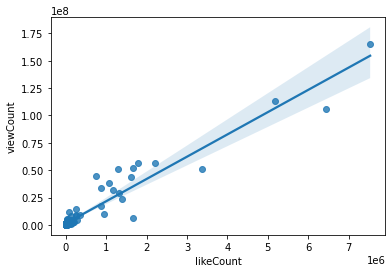

In [32]:
sns.regplot(x=df_copy['likeCount'], y=df_copy['viewCount'])

<AxesSubplot:xlabel='commentCount', ylabel='viewCount'>

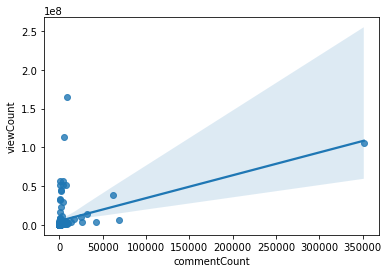

In [33]:
sns.regplot(x=df_copy['commentCount'], y=df_copy['viewCount'])

In [34]:
#Creating category_name column
f3 = open('category_list.json', 'r')
category = json.load(f3)
cat_dict = {}
for cat in category:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]
df_copy['category_name'] = df_copy['categoryId'].map(cat_dict)


/var/folders/jn/q6h7c5jx75n942fhjt9blgpc0000gn/T/ipykernel_1285/1581271411.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['category_name'] = df_copy['categoryId'].map(cat_dict)


In [35]:
def barplot(attribute, attribute_name):
    #Function to generate barplot based on View, Like, Comment
    total_attribute = df_copy.groupby('category_name').sum()[attribute]
    total_attribute_df = pd.DataFrame({'Category': total_attribute.index, attribute_name: total_attribute})
    total_attribute_df.index=[i for i in range(len(total_attribute_df['Category']))]
    total_attribute_df = total_attribute_df.sort_values(by=attribute_name, ascending=False)
    sns.barplot(x=attribute_name, y='Category', data=total_attribute_df)


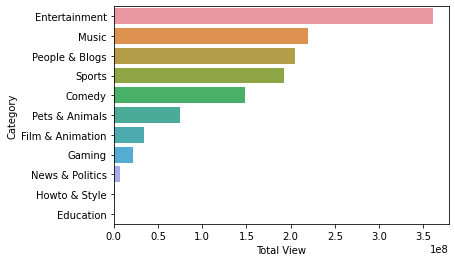

In [36]:
barplot('viewCount', 'Total View')

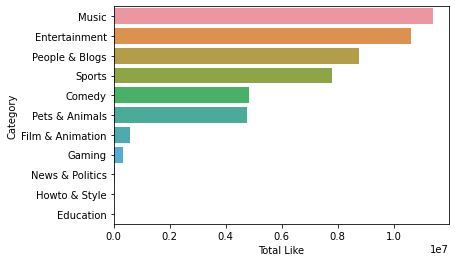

In [37]:
barplot('likeCount', 'Total Like')

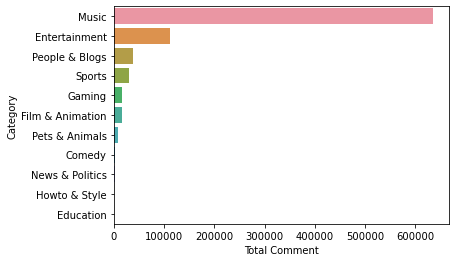

In [38]:
barplot('commentCount', 'Total Comment')

In [39]:
publishedAt = df_copy['publishedAt'] + timedelta(hours=7)
df_copy['publish_time'] = publishedAt.dt.time
df_copy['publish_hour'] = publishedAt.dt.hour
df_copy.head()

/var/folders/jn/q6h7c5jx75n942fhjt9blgpc0000gn/T/ipykernel_1285/2427261657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['publish_time'] = publishedAt.dt.time
/var/folders/jn/q6h7c5jx75n942fhjt9blgpc0000gn/T/ipykernel_1285/2427261657.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['publish_hour'] = publishedAt.dt.hour


,publishedAt,channelId,title,description,channelTitle,tags,categoryId,viewCount,likeCount,commentCount,category_name,publish_time,publish_hour
0,2022-05-06 14:28:11+00:00,UCndcERoL9eG-XNljgUk1Gag,🔴Trực tiếp | U23 Việt Nam - U23 Indonesia | B...,VFF Channel | 🔴Trực tiếp | U23 Việt Nam - U23...,VFF Channel,"[U23 Vietnam - U23 Indonesia, U23 Indonesia vs...",17,1673462.0,12406.0,32.0,Sports,21:28:11,21
1,2022-05-06 13:57:52+00:00,UCoqrrrfDpWOgdqw1vRoiG_A,Highlights Việt Nam vs Indonesia | Hùng Dũng ...,#Highlights #Vietnam #Indonesia #SEAGames31\nH...,MÃN NHÃN TV,"[Highlights việt nam vs indonesia, Highlights ...",17,1592686.0,14540.0,1992.0,Sports,20:57:52,20
2,2022-05-06 14:28:42+00:00,UCljFFNaQoJWeP91Bz4m_3bw,🔴 TRỰC TIẾP: U23 VIỆT NAM vs U23 INDONESIA (BẢ...,🔴 TRỰC TIẾP: U23 VIỆT NAM vs U23 INDONESIA (BẢ...,FPT Bóng Đá Việt,"[việt nam indo, vn indo, vn indonesia, việt na...",17,1787328.0,15026.0,84.0,Sports,21:28:42,21
3,2022-05-06 14:15:06+00:00,UCFF85Rdo1MqYCFxfmByBOdw,Trực Tiếp VIỆT NAM vs INDONESIA (Bản Chính Thứ...,Trực Tiếp VIỆT NAM vs INDONESIA (Bản Chính Thứ...,Đỗ Kim Phúc - Freestyle Football,"[việt nam indonesia seagame 31, viet nam indon...",17,797896.0,9286.0,279.0,Sports,21:15:06,21
4,2022-05-06 14:30:52+00:00,UCV7c-u0gXHrWb3JbYyP0Ffg,🔴Trực Tiếp VIỆT NAM vs INDONESIA ( Bản Chính T...,#VietNam #Indonesia #Seagames\n🔴Trực Tiếp VIỆT...,Trực Tiếp Bóng Đá,"[việt nam vs indonesia seagame 31, việt nam vs...",17,830267.0,8133.0,5.0,Sports,21:30:52,21


<AxesSubplot:xlabel='Publish Hour', ylabel='Number of popular videos'>

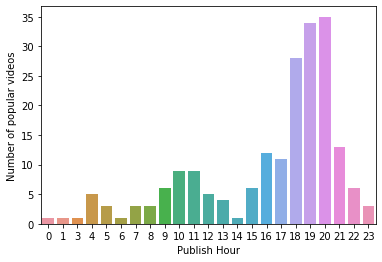

In [40]:
#Generating bar plot of no popular videos according to publish hour
total_vid_hour = df_copy.groupby('publish_hour').size()
total_vid_hour_df = pd.DataFrame({'Publish Hour': total_vid_hour.index, 'Number of popular videos': total_vid_hour})
sns.barplot(x='Publish Hour', y='Number of popular videos', data=total_vid_hour_df)